# Finding if a Coin is Fair or Fake 

We consider the folowing problem: Given a sequence of coin tosses $X = \{x^{(n)}\}_{n=1\dots N}$, determine if the coin is fair or fake.

This can be cast as a model selection problem:

\begin{eqnarray}
\pi|m & \sim & \left\{ \begin{array}{cc} \delta(\pi - 0.5) & m = 0\\ 0.5 \mathcal{B}(\pi; 20, 3) + 0.5 \mathcal{B}(\pi; 3, 20) & m = 1 \end{array} \right.
\end{eqnarray}
For $n = 1\dots N$
\begin{eqnarray}
x^{(n)}| \pi & \sim & \mathcal{BE}(x; \pi)
\end{eqnarray}

This model defines the following:
- The indicator $m$, that denotes if the coin is fake,
- What a fake coin is: a fake coin is one that has an arbitrary probability $\pi$ between $0$ and $1$. 
- What a fair coin is: a fair coin has $\pi = 0.5$

We need to calculate the marginal likelihoods for $m=0$ and $m=1$
\begin{eqnarray}
p(X| m) & = & \int d\pi p(X | \pi) p(\pi|m)
\end{eqnarray}

###### Not Fake
\begin{eqnarray}
p(X| m) & = & \int d\pi p(X| \pi) \delta(\pi - 0.5) \\
& = & \prod_{n=1}^N \left(\frac{1}{2}\right)^{x^{(n)}} \left(\frac{1}{2}\right)^{1-x^{(n)}} = \frac{1}{2^N}
\end{eqnarray}

###### Fake

\begin{eqnarray}
p(X| m) & = & \int d\pi \frac{1}{2} p(\pi; 20, 3) \prod_{n=1}^{N} p(x^{(n)}| \pi) + \int d\pi \frac{1}{2} p(\pi; 3, 20) \prod_{n=1}^{N} p(x^{(n)}| \pi) \\
& = &  \int d\pi \frac{1}{2} \left(\prod_{n=1}^N \left(1-\pi\right)^{1-x^{(n)}} \pi^{x^{(n)}} \right) \mathcal{B}(\pi; 20, 3) + \int d\pi \frac{1}{2} \left(\prod_{n=1}^N \left(1-\pi\right)^{1-x^{(n)}} \pi^{x^{(n)}} \right) \mathcal{B}(\pi; 3, 20) \\
& = & \frac{1}{2} \left(\frac{\Gamma(20 + 3)}{\Gamma(20)\Gamma(3)} \int d\pi \left(1-\pi\right)^{c_0+3-1} \pi^{c_1+20-1}\right) + \frac{1}{2} \left(\frac{\Gamma(3 + 20)}{\Gamma(3)\Gamma(20)} \int d\pi \left(1-\pi\right)^{c_0+20-1} \pi^{c_1+3-1}\right) \\
& = & \frac{1}{2} \frac{\Gamma(20 + 3)}{\Gamma(20)\Gamma(3)} \left(\frac{\Gamma(20 + c_1) \Gamma(3 + c_0)}{\Gamma(20 + 3 + c_1 + c_0)} + \frac{\Gamma(3 + c_1) \Gamma(20 + c_0)}{\Gamma(20 + 3 + c_1 + c_0)}\right) \\
& = & \frac{1}{2} \frac{\Gamma(23)}{\Gamma(20)\Gamma(3)} \left(\frac{\Gamma(20 + c_1) \Gamma(3 + c_0)}{\Gamma(23 + N)} + \frac{\Gamma(3 + c_1) \Gamma(20 + c_0)}{\Gamma(23 + N)}\right)
\end{eqnarray}

* $ N $ : The size of dataset
* $c_{1}$ : Total number of ones
* $c_{0}$ : Total number of zeroes

The log-odds is the ratio of marginal likelihoods

$$
l(X) = \log\left( \frac{p(X|m = \text{Fair})}{p(X|m = \text{Fake})} \right)
$$

If $l(X)>0$, we may conclude that the coin is fair and biased when $l<0$.

In [1]:
import numpy as np
import scipy.special as sps
import math
import matplotlib.pyplot as plt

def log_odds(c_0, c_1):
    # Total number of tosses
    N = c_0 + c_1
    
    M_fair = N*np.log(0.5)
    M_fake = 0.5 * (sps.gamma(23)/(sps.gamma(20)*sps.gamma(3)))
    M_fake = M_fake * ( ((sps.gamma(20+c_1)*sps.gamma(3+c_0))/sps.gamma(23+c_0+c_1)) + ((sps.gamma(3+c_1)*sps.gamma(20+c_0))/sps.gamma(23+c_0+c_1)) )
    M_fake = np.log(M_fake)
    return M_fair - M_fake

# Number of Zeros observed
c_0 = 6
# Number of Ones
c_1 = 1

# Prior
# a = 20
# b = 3

print('log_odds = ', log_odds(c_0, c_1) )

log_odds =  -1.13641225583


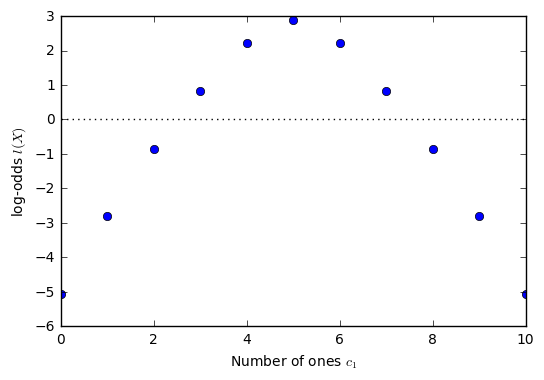

In [2]:
# a = 20
# b = 3

N = 10

l = np.zeros(N+1)

for c in range(0,N+1):
    l[c] = log_odds(N-c, c)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

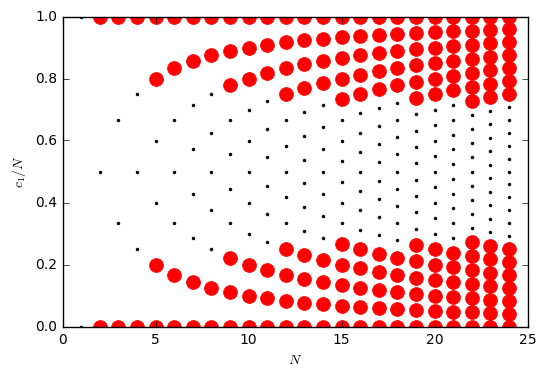

In [3]:
a = 1
b = 1

for N in range(1, 25):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds(N-c, c)
    
    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/N
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

# Bayesian Inference in Change Point Detection (Booklet Q74)

Supppose we observe the following dataset $x_t \subset 0, 1 for t = 1..50$

0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1

* Suppose we know that the data comes from the following model

\begin{eqnarray}
\pi_1 & \sim & \mathcal{B}(1, 1) \\
\pi_2 & \sim & \mathcal{B}(1, 1) \\
x_t|m & \sim & \left\{ \begin{array}{cc} \mathcal{BE}(x_t; \pi_1) & t \leq n\\ \mathcal{BE}(x_t; \pi_2) & t > n \end{array} \right. \\
m & \sim & \mathcal{U}(1, T)
\end{eqnarray}

* Derive, compute and plot the posterior probability of $ p(n|x_{1:50}) $ given that n is a-priori uniform.

The general formula:
\begin{eqnarray}
p(n | X) = \frac{ p(n, X)}{p(X)} = \frac{p(X | n) p(n=k)}{p(X)}
\end{eqnarray}

The obvioues ones:
\begin{eqnarray}
p(n = k) & = & \frac{1}{N} \\
p(X) & = & \sum_{i=1}^{N} p(m| X)
\end{eqnarray}

We need to calculate the marginal likelihoods for $n=k$  where $k = 1\dots N$
\begin{eqnarray}
p(X| n) & = & \int d\pi p(X | \pi) p(\pi|n=k)
\end{eqnarray}

\begin{eqnarray}
p(X| n=k) & = & \int d\pi_1 p(\pi_1) \prod_{i=1}^{k-1} p(x^{(k)}| \pi_1)  \int d\pi_2 p(\pi_2) \prod_{i=k}^{N} p(x^{(k)}| \pi_2) \\
& = &  \int d\pi_1 \left(\prod_{i=1}^{k-1} \left(1-\pi_1\right)^{1-x^{(i)}} \pi_1^{x^{(i)}} \right) \mathcal{B}(\pi_1; 1, 1) \int d\pi_2 \left(\prod_{i=k}^{N} \left(1-\pi_2\right)^{1-x^{(i)}} \pi_2^{x^{(i)}} \right) \mathcal{B}(\pi_2; 1, 1) \\
& = & \left( \frac{\Gamma(1 + 1)}{\Gamma(1)\Gamma(1)} \int d\pi_1 \left(1-\pi_1\right)^{c_{10}+1-1} \pi_1^{c_{11}+1-1} \right) \left( \frac{\Gamma(1 + 1)}{\Gamma(1)\Gamma(1)} \int d\pi_2 \left(1-\pi_2\right)^{c_20+1-1} \pi_2^{c_21+1-1} \right) \\
& = & \left(\frac{\Gamma(1 + 1)}{\Gamma(1)\Gamma(1)} \frac{\Gamma(c_{10}+1)\Gamma(c_{11}+1)}{\Gamma((k-1) + 1 + 1)}\right) \left(\frac{\Gamma(1 + 1)}{\Gamma(1)\Gamma(1)} \frac{\Gamma(c_{20}+1)\Gamma(c_{21}+1)}{\Gamma((N-k+1) + 1 + 1)}\right) \\
& = & \left(\frac{\Gamma(2)}{\Gamma(1)\Gamma(1)}\right)^2 \left(\frac{\Gamma(c_{10}+1)\Gamma(c_{11}+1)}{\Gamma(k+1)}\right) \left(\frac{\Gamma(c_{20}+1)\Gamma(c_{21}+1)}{\Gamma(N-k+3)}\right)
\end{eqnarray}

* $ N $ : The size of dataset (N = 50 for the given dataset)
* $c_{10}$ : Total number of zeroes before $k^{th}$ number
* $c_{11}$ : Total number of ones before $k^{th}$ number
* $c_{20}$ : Total number of zeroes after $k^{th}$ number (including $k^{th}$ number)
* $c_{21}$ : Total number of ones after $k^{th}$ number (including $k^{th}$ number)



To get more precise results we took the log of probabilities. Then we normalize the data and plot it to show the probability distribution of n.

data:  [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

logChangePoints =  [ 0.0248804   0.02526424  0.02560109  0.02565072  0.02602396  0.02597287
  0.0263866   0.02627851  0.02673955  0.02658894  0.027107    0.02691892
  0.02750768  0.02728272  0.02713614  0.0270575   0.02750933  0.0281879
  0.027954    0.02778733  0.02850516  0.02958022  0.03122484  0.03403313
  0.03324973  0.03257246  0.03198801  0.03148721  0.03106448  0.03071791
  0.03044983  0.03026861  0.03019286  0.03026191  0.03056825]



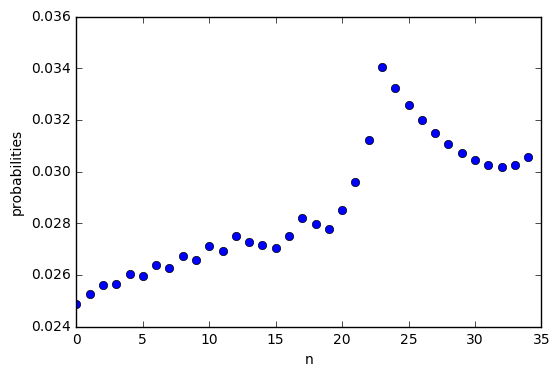

In [6]:
import numpy as np
import scipy.special as sps
import math
import matplotlib.pyplot as plt

def logChangePoint(seri):
    # Total number of tosses
    N = len(seri)
    
    Ms = []
    
    for m in range(N):
        c = [[0, 0], [0, 0]]
        
        for j in range(N):
            if j < m:
                c[0][seri[j]] = c[0][seri[j]] + 1
            else:
                c[1][seri[j]] = c[1][seri[j]] + 1
            
        res = 2 * (sps.gammaln(1+1) - sps.gammaln(1) - sps.gammaln(1))
        res = res + sps.gammaln(c[0][1]+1) + sps.gammaln(c[0][0]+1) - sps.gammaln(1+1+m-1)
        res = res + sps.gammaln(c[1][1]+1) + sps.gammaln(c[1][0]+1) - sps.gammaln(1+1+N-m+1)
        res = res - math.log(N)
        
        Ms.append(res)
    
    return Ms

seri = [1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1]

# Prior
# a = 1
# b = 1


logChange = logChangePoint(seri)

for i in range(len(logChange)):
    logChange[i] = -1 / logChange[i]

sm = 0
for k in logChange:
    sm = sm + k

logChange = logChange / sm
print('data: ', seri)
print()
print('logChangePoints = ', logChange)
print()

plt.plot(range(len(logChange)), logChange, 'o')
ax = plt.gca()
ax.set_xlabel('n')
ax.set_ylabel('probabilities')
plt.show()